<a href="https://colab.research.google.com/github/Monique14041980/.ipython/blob/main/C%C3%B3pia_de_MoniqueDATATHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Sobre a 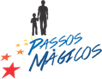

**A HISTÓRIA**


A Associação Passos Mágicos tem uma trajetória de 30 anos de atuação, trabalhando na transformação da vida de crianças e jovens de baixa renda os levando a melhores oportunidades de vida.

A transformação, idealizada por Michelle Flues e Dimetri Ivanoff, começou em 1992, atuando dentro de orfanatos, no município de Embu-Guaçu.

Em 2016, depois de anos de atuação, decidem ampliar o programa para que mais jovens tivessem acesso a essa fórmula mágica para transformação que inclui: educação de qualidade, auxílio psicológico/psicopedagógico, ampliação de sua visão de mundo e protagonismo. Passaram então a atuar como um projeto social e educacional, criando assim a Associação Passos Mágicos.

**O QUE FAZEM**?

Oferecemos um programa de educação de qualidade para crianças e jovens do município de Embu-Guaçu.

## **O DESAFIO**

**Objetivo**

O grande objetivo do Datathon é você como cientista de dados criar uma proposta preditiva ou como analista de dados realizar uma proposta analítica para demonstrar o impacto que a ONG "Passos Mágicos" tem realizado sobre a comunidade que atende. A associação busca instrumentalizar o uso da educação como ferramenta para a mudança das condições de vida das crianças e jovens em vulnerabilidade social.

Com base no dataset de pesquisa extensiva do desenvolvimento educacional no período de 2020, 2021 e 2023, você pode entregar uma das seguintes propostas:


Proposta analítica: criar um storytelling para demonstrar os impactos que a ONG "Passos Mágicos" realizou sobre a performance de estudantes e levantar indicadores de performance. A ideia é realizar um dashboard e um storytelling contando uma história com os dados para auxiliar a Passos Mágicos a tomar as melhores decisões com base nos indicadores e conhecer o perfil dos estudantes.

Proposta preditiva: criar um modelo preditivo para prever o comportamento do estudante com base em algumas variáveis que podem ser cruciais para a identificação do desenvolvimento do estudante. Na proposta preditiva, você pode utilizar a criatividade para propor uma solução de algoritmo supervisionado ou não supervisionado. A ideia é utilizar um dos conhecimentos aprendidos no curso como solução (machine learning, deep learning ou processamento de linguagem natural).

Base de dados

A base de dados contém informações educacionais e socioeconômica dos estudantes da Passos mágicos.

Vão ser disponibilizadas bases de dados com as características de desenvolvimento educacional e questões socioeconômicas dos estudantes e um dicionário de dados com o mapeamento de todas as variáveis. Além da base de dados, alguns relatórios de pesquisa realizada pela Passos Mágicos também serão disponibiliza-dos para auxiliar no conhecimento do negócio.

## Preparação dos Dados 📚

### Carregando os Dados

In [3]:
# Importando as bibliotecas necessárias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.linear_model import LinearRegression

# Carregando o dataset:
df = pd.read_csv("PEDE_PASSOS_DATASET_FIAP.csv", sep= ";")

In [4]:
# Verificar as primeiras linhas
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [5]:
# Informações do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [6]:
# Sumário estatístico
df.describe()

,FASE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,DEFASAGEM_2021,FASE_2022,...,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,IPV_2022,IAN_2022
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.00000,686.000000,686.000000,862.000000,...,862.000000,862.000000,862.000000,860.000000,860.000000,285.000000,862.000000,862.000000,862.000000,862.000000
mean,2.276968,8.153499,6.822595,6.843586,5.425948,7.576385,7.40758,6.902332,-0.752187,2.110209,...,7.880728,6.901102,6.070688,5.796318,6.306628,5.839942,3.056845,6.299364,7.247953,6.421114
std,1.798368,2.193629,2.458627,1.457148,2.141566,1.072318,1.62708,2.484979,0.792181,1.802222,...,1.649023,1.070202,2.059346,2.422292,2.092551,2.992093,0.775806,1.135510,1.098548,2.387816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.500000,-4.000000,0.000000,...,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.500010,2.500000
25%,1.000000,7.900000,5.300000,6.900000,4.100000,7.300000,6.60000,5.000000,-1.000000,1.000000,...,6.999971,6.250000,4.750000,4.316667,5.166667,3.500000,2.000000,5.625000,6.722220,5.000000
50%,2.000000,8.800000,7.200000,7.500000,5.850000,7.700000,7.70000,5.000000,-1.000000,2.000000,...,8.312179,7.500000,6.333333,6.000000,6.650000,6.266667,3.000000,6.250000,7.333335,5.000000
75%,3.000000,9.500000,8.800000,7.500000,6.900000,8.100000,8.60000,10.000000,0.000000,3.000000,...,9.102970,7.500000,7.583333,7.833333,7.833333,8.500000,4.000000,7.031250,7.916665,10.000000
max,7.000000,10.000000,10.000000,8.800000,9.500000,10.000000,10.00000,10.000000,3.000000,7.000000,...,10.000000,10.000000,9.916667,10.000000,10.000000,10.000000,4.000000,9.218750,10.000010,10.000000


In [7]:
# Verificar valores ausentes
df.isnull().sum()

INSTITUICAO_ENSINO_ALUNO_2020    621
NOME                               0
IDADE_ALUNO_2020                 621
ANOS_PM_2020                     621
FASE_TURMA_2020                  621
                                ... 
INDICADO_BOLSA_2022              487
PONTO_VIRADA_2022                487
IPV_2022                         487
IAN_2022                         487
NIVEL_IDEAL_2022                 487
Length: 69, dtype: int64

### Limpeza de dados: tratamento de valores ausentes, correção de tipos de dados, etc.

In [8]:
# Converter a coluna IEG para numérico:
df['IEG_2020'] = pd.to_numeric(df['IEG_2020'], errors='coerce')

# Definir os limites dos grupos (bins):
bins = [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Criar grupos com base nos bins:
df['IEG_2020_grouped'] = pd.cut(df['IEG_2020'], bins=bins)


In [9]:
# Primeiro, verifique se a coluna 'IDADE_ALUNO_2020' está no formato correto.
# Se ela contiver algum valor não numérico, você precisará tratá-los.
df['IDADE_ALUNO_2020'] = pd.to_numeric(df['IDADE_ALUNO_2020'], errors='coerce')

# Agora, agrupando as idades em intervalos para facilitar a visualização.
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  # Ajuste os bins conforme necessário para seu dataset
df['IDADE_ALUNO_2020_GROUPED'] = pd.cut(df['IDADE_ALUNO_2020'], bins=bins)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object  
 1   NOME                           1349 non-null   object  
 2   IDADE_ALUNO_2020               727 non-null    float64 
 3   ANOS_PM_2020                   728 non-null    object  
 4   FASE_TURMA_2020                728 non-null    object  
 5   PONTO_VIRADA_2020              702 non-null    object  
 6   INDE_2020                      728 non-null    object  
 7   INDE_CONCEITO_2020             728 non-null    object  
 8   PEDRA_2020                     728 non-null    object  
 9   DESTAQUE_IEG_2020              728 non-null    object  
 10  DESTAQUE_IDA_2020              728 non-null    object  
 11  DESTAQUE_IPV_2020              703 non-null    object  
 12  IAA_2020                       728

#### Preparando os dados de Progresso ao Longo do Tempo

In [11]:
# Preparar o DataFrame
df_INDE = pd.melt(df,
                  id_vars=['NOME'],
                  value_vars=['INDE_2020', 'INDE_2021', 'INDE_2022'],
                  var_name='ANO',
                  value_name='INDE')

# Substituir os nomes das variáveis pelo ano correspondente
df_INDE['ANO'] = df_INDE['ANO'].str.replace('INDE_', '')

# Remover quaisquer linhas que contenham NaN no valor do INDE, se necessário
df_INDE = df_INDE.dropna(subset=['INDE'])

# Ordenar os dados e reiniciar o índice
df_INDE = df_INDE.sort_values(by=['NOME', 'ANO']).reset_index(drop=True)

# Agora 'df_INDE' está pronto para análise

In [12]:
# Preparar o DataFrame
df_PEDRA = pd.melt(df,
                  id_vars=['NOME'],
                  value_vars=['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022'],
                  var_name='ANO',
                  value_name='PEDRA')

# Substituir os nomes das variáveis pelo ano correspondente
df_PEDRA['ANO'] = df_PEDRA['ANO'].str.replace('PEDRA_', '')

# Remover quaisquer linhas que contenham NaN no valor do PEDRA, se necessário
df_PEDRA = df_PEDRA.dropna(subset=['PEDRA'])

# Ordenar os dados e reiniciar o índice
df_PEDRA = df_PEDRA.sort_values(by=['NOME', 'ANO']).reset_index(drop=True)

# Agora 'df_PEDRA' está pronto para análise

#### Preparando os dados de Engajamento e Sucesso Educacional

In [13]:
# Preparar o DataFrame
df_IEG = pd.melt(df,
                  id_vars=['NOME'],
                  value_vars=['IEG_2020', 'IEG_2021', 'IEG_2022'],
                  var_name='ANO',
                  value_name='IEG')

# Substituir os nomes das variáveis pelo ano correspondente
df_IEG['ANO'] = df_IEG['ANO'].str.replace('IEG_', '')

# Remover quaisquer linhas que contenham NaN no valor do IEG, se necessário
df_IEG = df_IEG.dropna(subset=['IEG'])

# Ordenar os dados e reiniciar o índice
df_IEG = df_IEG.sort_values(by=['NOME', 'ANO']).reset_index(drop=True)

# Agora 'df_IEG' está pronto para análise

#### Preparando os dados de Virada

In [14]:
# Preparar o DataFrame
df_PONTO_VIRADA = pd.melt(df,
                  id_vars=['NOME'],
                  value_vars=['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022'],
                  var_name='ANO',
                  value_name='PONTO_VIRADA')

# Substituir os nomes das variáveis pelo ano correspondente
df_PONTO_VIRADA['ANO'] = df_PONTO_VIRADA['ANO'].str.replace('PONTO_VIRADA_', '')

# Remover quaisquer linhas que contenham NaN no valor do PONTO_VIRADA, se necessário
df_PONTO_VIRADA = df_PONTO_VIRADA.dropna(subset=['PONTO_VIRADA'])

# Ordenar os dados e reiniciar o índice
df_PONTO_VIRADA = df_PONTO_VIRADA.sort_values(by=['NOME', 'ANO']).reset_index(drop=True)

# Agora 'df_PONTO_VIRADA' está pronto para análise

#### Preparando os dados de Fatores Psicossociais e Pedagógicos

In [15]:
# Preparar o DataFrame
df_IPS = pd.melt(df,
                  id_vars=['NOME'],
                  value_vars=['IPS_2020', 'IPS_2021', 'IPS_2022'],
                  var_name='ANO',
                  value_name='IPS')

# Substituir os nomes das variáveis pelo ano correspondente
df_IPS['ANO'] = df_IPS['ANO'].str.replace('IPS_', '')

# Remover quaisquer linhas que contenham NaN no valor do IPS, se necessário
df_IPS = df_IPS.dropna(subset=['IPS'])

# Ordenar os dados e reiniciar o índice
df_IPS = df_IPS.sort_values(by=['NOME', 'ANO']).reset_index(drop=True)

# Agora 'df_IPS' está pronto para análise

In [16]:
# Preparar o DataFrame
df_IPP = pd.melt(df,
                  id_vars=['NOME'],
                  value_vars=['IPP_2020', 'IPP_2021', 'IPP_2022'],
                  var_name='ANO',
                  value_name='IPP')

# Substituir os nomes das variáveis pelo ano correspondente
df_IPP['ANO'] = df_IPP['ANO'].str.replace('IPP_', '')

# Remover quaisquer linhas que contenham NaN no valor do IPP, se necessário
df_IPP = df_IPP.dropna(subset=['IPP'])

# Ordenar os dados e reiniciar o índice
df_IPP = df_IPP.sort_values(by=['NOME', 'ANO']).reset_index(drop=True)

# Agora 'df_IPP' está pronto para análise

In [17]:
# Lista de todos os dataframes para unificar
dataframes = [df_INDE, df_PEDRA, df_IEG, df_PONTO_VIRADA, df_IPS, df_IPP]

# Função para unir os dataframes baseado em 'NOME' e 'ANO'
def merge_dfs(df_list):
    df_final = reduce(lambda left, right: pd.merge(left, right, on=['NOME', 'ANO'], how='outer'), df_list)
    return df_final

# Unificar todos os dataframes
df_unificado = merge_dfs(dataframes)

# Mostrar as primeiras linhas do dataframe unificado
df_unificado.head()


,NOME,ANO,INDE,PEDRA,IEG,PONTO_VIRADA,IPS,IPP
0,ALUNO-1,2020,7.883752,Ametista,8.7,Não,7.5,5.9375
1,ALUNO-1,2021,7.319,Ametista,6.3,Não,6.9,7.7
2,ALUNO-10,2020,5.1618745,Quartzo,5.2,Não,3.75,7.96875
3,ALUNO-100,2020,6.908335000000001,Ágata,6.5,Não,4.375,6.875
4,ALUNO-100,2021,3.117,Quartzo,0.0,Não,3.8,6.3


## Análise de Dados 👨‍💻

### Análise Univariada

#### Analise a distribuição de algumas variáveis chave, como IDADE_ALUNO_2020, INDE_2020, IEG_2020, etc. Histogramas e boxplots são úteis aqui.

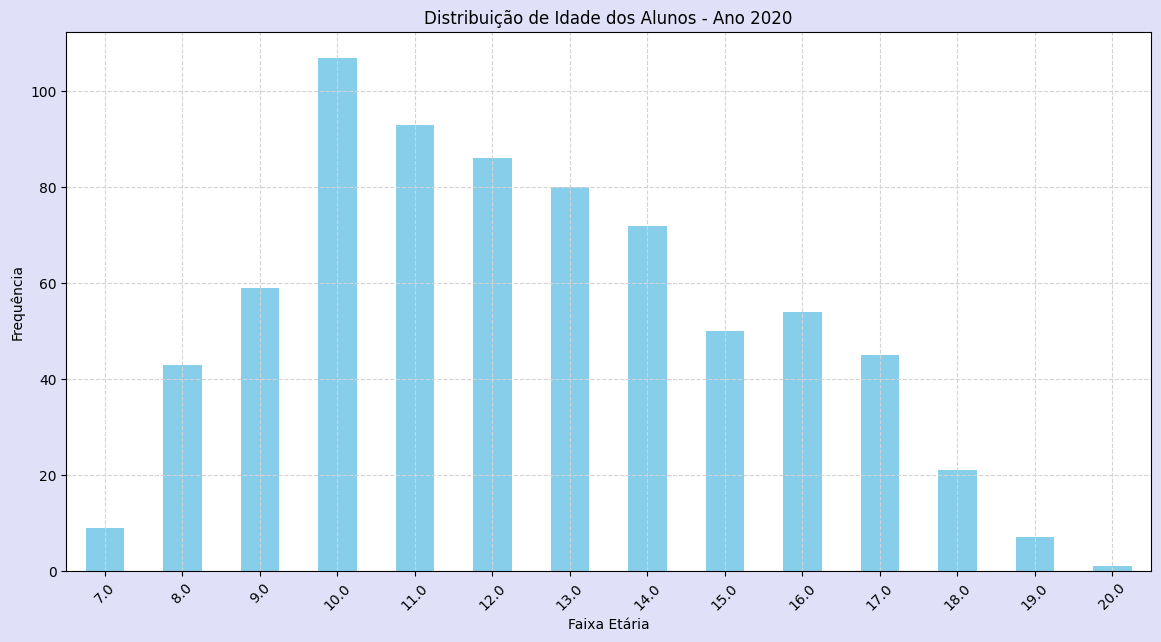

In [18]:
plt.figure(figsize=(14,7)).set_facecolor('#E0E0F8') # Ajustar o tamanho do gráfico e a cor de fundo
df['IDADE_ALUNO_2020'].value_counts().sort_index().plot(kind='bar', color='skyblue')  # Ajustar o número de bins
plt.title('Distribuição de Idade dos Alunos - Ano 2020')  # Adicionar título
plt.xlabel('Faixa Etária')  # Adicionar rótulo ao eixo X
plt.ylabel('Frequência')  # Adicionar rótulo ao eixo Y
plt.xticks(rotation=45, fontsize=10)  # Rotacionar as etiquetas do eixo X e ajustar o tamanho da fonte
plt.yticks(fontsize=10)  # Ajustar o tamanho da fonte do eixo Y
plt.grid(True, color='lightgray', linestyle='--') # Adicionar grade
plt.grid(True)  # Adicionar grade
plt.show()  # Exibir o gráfico

### Observando o gráfico da distribuição de idade dos alunos da ONG "Passos Mágicos" para o ano de 2020, podemos notar alguns pontos que podem oferecer insights úteis 🔍

#### 01 Faixas Etárias Concentradas: Há uma concentração significativa de alunos nas faixas etárias de 10 a 13 anos, o que pode sugerir que os programas da ONG são particularmente atraentes ou adequados para este grupo etário. Isso poderia ser reflexo da fase de ensino onde o suporte adicional é mais necessário ou procurado.

#### 02 Decréscimo Progressivo com a Idade: Nota-se uma tendência de decréscimo no número de alunos à medida que a idade aumenta, especialmente após os 14 anos. Isso pode indicar que a retenção de alunos mais velhos é um desafio, ou que os programas são menos aplicados ou menos acessíveis para esse grupo.

#### 03 Potencial de Expansão: A redução da frequência de alunos com mais de 14 anos pode apontar para uma oportunidade de expandir ou adaptar programas para atender melhor às necessidades dos adolescentes nessa faixa etária.

#### 04 Informações Adicionais Necessárias: Para entender melhor esses padrões, seria útil combinar esses dados com outras variáveis, como o desempenho educacional, engajamento em atividades da ONG e dados socioeconômicos. Isso ajudaria a identificar se as idades estão correlacionadas com outros fatores relevantes para a missão da ONG.

#### 05 Ações Estratégicas: Se a ONG está procurando ampliar seu impacto em grupos de idades específicos, esses dados podem ajudar a direcionar estratégias e recursos de maneira eficaz.

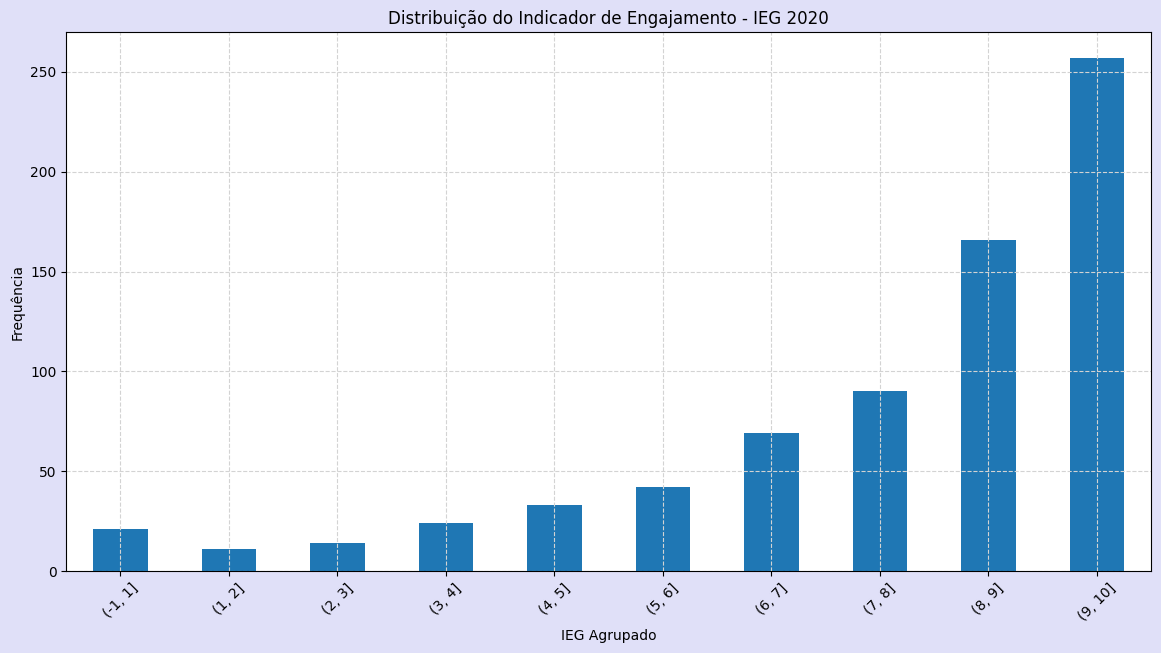

In [19]:
plt.figure(figsize=(14,7)).set_facecolor('#E0E0F8') # Ajustar o tamanho do gráfico e a cor de fundo
df['IEG_2020_grouped'].value_counts().sort_index().plot(kind='bar')  # Ajustar o número de bins
plt.title('Distribuição do Indicador de Engajamento - IEG 2020')  # Adicionar título
plt.xlabel('IEG Agrupado')  # Adicionar rótulo ao eixo X
plt.ylabel('Frequência')  # Adicionar rótulo ao eixo Y
plt.xticks(rotation=45, fontsize=10)  # Rotacionar as etiquetas do eixo X e ajustar o tamanho da fonte
plt.yticks(fontsize=10)  # Ajustar o tamanho da fonte do eixo Y
plt.grid(True, color='lightgray', linestyle='--') # Adicionar grade
plt.grid(True)  # Adicionar grade
plt.show() # Exibir o gráfico

### Para o gráfico do Indicador de Engajamento (IEG) 2020 agrupado, aqui estão alguns possíveis insights 🔍

#### 01 Engajamento Elevado: Existe uma notável quantidade de alunos com alto engajamento, como indicado pelas barras mais altas nas extremidades do gráfico, especialmente na faixa de 9 a 10. Isso pode sugerir que os programas estão tendo sucesso em manter ou elevar o engajamento dos alunos.

#### 02 Distribuição de Engajamento: A distribuição dos dados parece ser bimodal, com picos em ambas as extremidades do espectro do IEG. Isso poderia indicar a existência de dois subgrupos distintos dentro da população de alunos: um grupo altamente engajado e um grupo com engajamento baixo ou moderado.

#### 03 Intervenções Focadas: Os alunos nas faixas intermediárias de engajamento (por exemplo, 4 a 7) podem representar um grupo-alvo para intervenções focadas para melhorar seu engajamento.

#### 04 Avaliação de Programas: A presença de alunos com baixo engajamento também é um ponto importante. A ONG pode usar essa informação para avaliar e possivelmente reformular aspectos dos seus programas para melhor atender às necessidades desses alunos.

In [20]:
# Exemplo de como você pode começar a separar os grupos baseado no IEG:
grupo_alto_engajamento = df[df['IEG_2020'] >= 7]
grupo_baixo_engajamento = df[df['IEG_2020'] < 7]

#### Indicadores de Desempenho: Colunas como INDE_2020 e PEDRA_2020. Estes são os indicadores gerais de desempenho e classificação dos alunos, que podem ajudar a entender se há uma relação entre engajamento e desempenho educacional.

In [21]:
# Calcular estatísticas descritivas para a coluna de desempenho
grupo_alto_engajamento['INDE_2020'].describe()

count          520
unique         520
top       7.883752
freq             1
Name: INDE_2020, dtype: object

In [22]:
# Exemplo de como verificar a correlação entre o IEG e outras variáveis:
# Selecionar apenas colunas numéricas para calcular a correlação
colunas_numericas = grupo_alto_engajamento.select_dtypes(include=['number'])
correlacoes_alto = colunas_numericas.corr()
correlacoes_alto

,IDADE_ALUNO_2020,IEG_2020,FASE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,...,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,IPV_2022,IAN_2022
IDADE_ALUNO_2020,1.000000,-0.187534,0.868081,-0.079072,-0.100567,-0.171915,0.125997,0.132043,-0.034575,-0.119150,...,-0.301960,-0.066230,-0.126726,-0.058642,-0.330832,0.083748,0.659333,0.480752,-0.070986,-0.092563
IEG_2020,-0.187534,1.000000,-0.224405,0.203905,0.305435,0.001673,0.251319,0.010181,0.229672,0.063766,...,0.351011,-0.010273,0.258894,0.243291,0.207917,0.167086,-0.162621,-0.035094,0.261284,0.091844
FASE_2021,0.868081,-0.224405,1.000000,-0.016666,-0.000382,-0.108369,0.232617,0.219460,0.048604,0.259869,...,-0.156140,-0.005845,0.017880,0.037267,-0.223603,0.297157,0.646311,0.574356,0.095036,0.129248
IAA_2021,-0.079072,0.203905,-0.016666,1.000000,0.345727,0.168041,0.277153,0.153357,0.293371,0.076200,...,0.244145,0.164877,0.233700,0.238979,0.161998,0.115076,-0.007795,0.155963,0.226717,0.101488
IEG_2021,-0.100567,0.305435,-0.000382,0.345727,1.000000,0.130673,0.648577,0.470934,0.683298,0.078269,...,0.522327,0.147340,0.402214,0.357417,0.353778,0.271928,-0.034863,0.144963,0.383808,0.188795
IPS_2021,-0.171915,0.001673,-0.108369,0.168041,0.130673,1.000000,0.119708,0.311330,0.314181,0.056855,...,0.091960,0.396565,0.101151,0.094643,0.059038,0.155685,-0.019311,0.114725,0.120909,0.110862
IDA_2021,0.125997,0.251319,0.232617,0.277153,0.648577,0.119708,1.000000,0.424273,0.675365,0.123199,...,0.366489,0.128005,0.522401,0.496611,0.354269,0.386751,0.285992,0.426512,0.457194,0.327249
IPP_2021,0.132043,0.010181,0.219460,0.153357,0.470934,0.311330,0.424273,1.000000,0.701961,0.057134,...,0.219583,0.307866,0.250173,0.230034,0.188084,0.293375,0.256708,0.407998,0.364924,0.280943
IPV_2021,-0.034575,0.229672,0.048604,0.293371,0.683298,0.314181,0.675365,0.701961,1.000000,0.082334,...,0.434800,0.215756,0.404087,0.361177,0.330926,0.306522,0.160687,0.308637,0.461678,0.264121
IAN_2021,-0.119150,0.063766,0.259869,0.076200,0.078269,0.056855,0.123199,0.057134,0.082334,1.000000,...,0.212740,0.013859,0.181905,0.099574,0.166873,0.218011,0.049339,0.125327,0.180838,0.397375


In [23]:
grupo_baixo_engajamento['INDE_2020'].describe()

count          207
unique         207
top       5.076252
freq             1
Name: INDE_2020, dtype: object

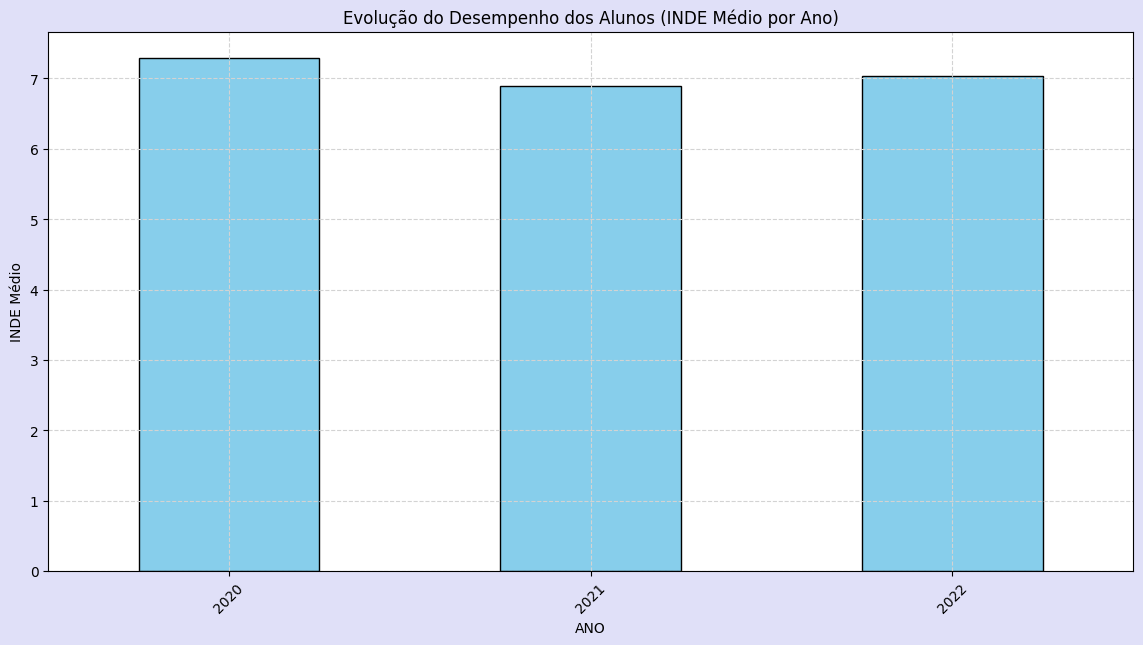

In [24]:
# Converter 'INDE' em numérico, forçando erros para NaN (Não é um número)
df_unificado['INDE'] = pd.to_numeric(df_unificado['INDE'], errors='coerce')

# Calcular a média 'INDE' por 'ANO' (Ano)
inde_media_por_ano = df_unificado.groupby('ANO')['INDE'].mean()

plt.figure(figsize=(14,7)).set_facecolor('#E0E0F8') # Ajustar o tamanho do gráfico e a cor de fundo
inde_media_por_ano.plot(kind='bar', color='skyblue', edgecolor='black') # Ajustar o número de bins
plt.title('Evolução do Desempenho dos Alunos (INDE Médio por Ano)')  # Adicionar título
plt.xlabel('ANO')  # Adicionar rótulo ao eixo X
plt.ylabel('INDE Médio')  # Adicionar rótulo ao eixo Y
plt.xticks(rotation=45, fontsize=10)  # Rotacionar as etiquetas do eixo X e ajustar o tamanho da fonte
plt.yticks(fontsize=10)  # Ajustar o tamanho da fonte do eixo Y
plt.grid(True, color='lightgray', linestyle='--') # Adicionar grade
plt.grid(True)  # Adicionar grade
plt.show() # Exibir o gráfico

### O gráfico ilustra a evolução do desempenho dos alunos ao longo dos anos, medido pelo INDE médio anual. Essa métrica pode ser interpretada como um indicador geral de como os alunos estão se saindo em relação aos critérios avaliados, possivelmente incluindo desempenho acadêmico, habilidades interpessoais, e desenvolvimento pessoal.

### No entanto, é importante considerar que o INDE é apenas uma das muitas métricas que devem ser usadas para avaliar o desempenho dos alunos de forma holística, incluindo fatores qualitativos que podem não ser capturados por esse índice.

### Importante considerarmos uma redução de 17 alunos de 2020 para 2021 e aumento de 146 alunos entre 2021 e 2022.

In [25]:
# Converter 'INDE', 'IEG', 'IPS', 'IPP' em numérico, forçando erros para NaN
cols_to_convert = ['INDE', 'IEG', 'IPS', 'IPP']
df_unificado[cols_to_convert] = df_unificado[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Recalcular as médias das métricas numéricas
mean_metrics = df_unificado[cols_to_convert].mean().to_frame('Mean')

# Corrigir a transformação da coluna 'PONTO_VIRADA'
df_unificado['PONTO_VIRADA'] = df_unificado['PONTO_VIRADA'].apply(lambda x: 1 if x == "Sim" else 0)

# Recalcular a porcentagem de alunos que atingiram o ponto de virada a cada ano
ponto_virada_percentage = df_unificado.groupby('ANO')['PONTO_VIRADA'].mean() * 100

# Agora vamos analisar a correlação entre PONTO_VIRADA e outras métricas
correlation = df_unificado[['INDE', 'IEG', 'IPS', 'IPP', 'PONTO_VIRADA']].corr()

mean_metrics, ponto_virada_percentage, correlation

(          Mean
 INDE  7.071757
 IEG   7.497884
 IPS   6.831462
 IPP   6.930016,
 ANO
 2020    12.912088
 2021    15.743440
 2022    13.109049
 Name: PONTO_VIRADA, dtype: float64,
                   INDE       IEG       IPS       IPP  PONTO_VIRADA
 INDE          1.000000  0.799979  0.318641  0.237575      0.413271
 IEG           0.799979  1.000000  0.136569  0.112858      0.279956
 IPS           0.318641  0.136569  1.000000  0.160638      0.139542
 IPP           0.237575  0.112858  0.160638  1.000000      0.256782
 PONTO_VIRADA  0.413271  0.279956  0.139542  0.256782      1.000000)

### Porcentagem de Alunos que Atingiram o Ponto de Virada por Ano:

#### 2020: 12.91%
#### 2021: 15.74%
#### 2022: 13.11%

### Correlações:

#### INDE e PONTO_VIRADA têm uma correlação de 0.41, indicando uma relação positiva entre o desenvolvimento educacional e alcançar o ponto de virada.
#### IEG (engajamento) e IPP (indicador psicopedagógico) têm uma correlação mais fraca com o PONTO_VIRADA, sendo 0.28 e 0.26, respectivamente.
#### IPS (indicador psicossocial) tem a correlação mais fraca de todas com o PONTO_VIRADA, com um valor de 0.14.

### Essas informações podem ser valiosas para os gestores entenderem os fatores que influenciam a probabilidade de um aluno atingir o ponto de virada. Estratégias para melhorar o INDE podem ser particularmente eficazes. A melhoria no engajamento e suporte psicopedagógico também pode ser benéfica, embora seu impacto possa não ser tão direto quanto o do desenvolvimento educacional medido pelo INDE.

In [26]:
# Criar um modelo de regressão linear
model = LinearRegression()

# Preparar os dados para regressão
# 'ANO' precisa ser reformulado para ser usado no modelo como recurso
X = df_unificado['ANO'].values.reshape(-1, 1)
y = df_unificado['INDE'].values.reshape(-1, 1)

# Precisamos reduzir os valores de NaN para a análise de regressão
non_nan_indices = ~np.isnan(y)
X_non_nan = X[non_nan_indices.flatten()]
y_non_nan = y[non_nan_indices.flatten()].reshape(-1, 1)

# Ajuste o modelo
model.fit(X_non_nan, y_non_nan)

# O coeficiente de 'ANO' em nosso modelo nos dirá a taxa de incremento por ano
coef_increment_per_year = model.coef_[0][0]
coef_increment_per_year


-0.12684013950541914

### A regressão linear entre o INDE e o ano indica um coeficiente de aproximadamente -0.1268. Isso significa que, de acordo com o modelo de regressão linear, existe uma tendência de diminuição do INDE médio por ano, contrariando o incremento observado entre 2021 e 2022.

In [27]:
# Agrupar os dados por ano e pedra, e contar o número de alunos em cada categoria
distribuicao_pedras_ano = df_unificado.groupby(['ANO', 'PEDRA']).size().unstack(fill_value=0)

distribuicao_pedras_ano


PEDRA,#NULO!,Ametista,D9891/2A,Quartzo,Topázio,Ágata
ANO,,,,,,
2020,0,336,1,128,92,171
2021,2,295,0,110,101,178
2022,0,348,0,134,130,250


### A análise da distribuição das classificações de pedra ao longo dos anos revela as seguintes tendências:

#### Quartzo: Houve uma ligeira variação na quantidade de alunos classificados como Quartzo ao longo dos anos, começando com 128 em 2020, diminuindo para 110 em 2021, e aumentando para 134 em 2022.
#### Ágata: A categoria Ágata viu um aumento constante no número de alunos classificados, de 171 em 2020 para 178 em 2021, e um salto significativo para 250 em 2022.
#### Ametista: A classificação Ametista teve um pequeno declínio de 336 em 2020 para 295 em 2021, mas aumentou significativamente para 348 em 2022.
#### Topázio: A classificação mais alta, Topázio, mostrou um aumento geral ao longo do tempo, de 92 em 2020 para 101 em 2021, e depois para 130 em 2022.
#### Outras classificações: Nota-se a presença de categorias não esperadas como "#NULO!" e "D9891/2A", indicando possivelmente entradas de dados incorretas ou incompletas.

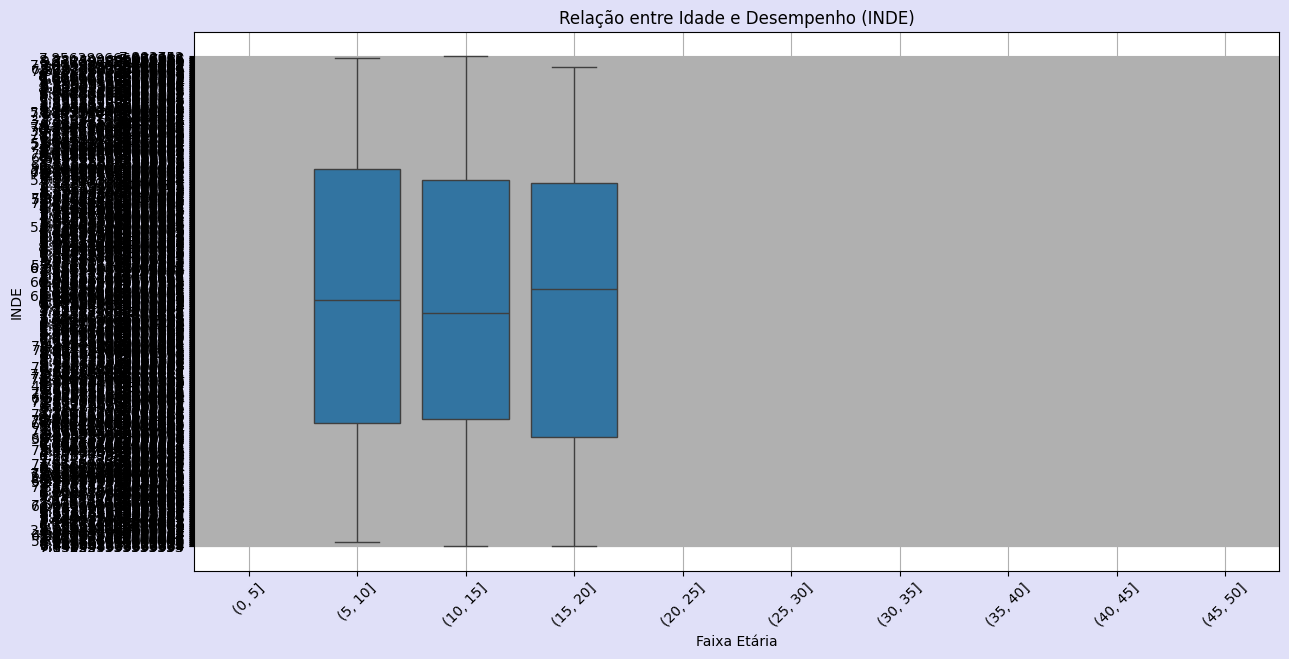

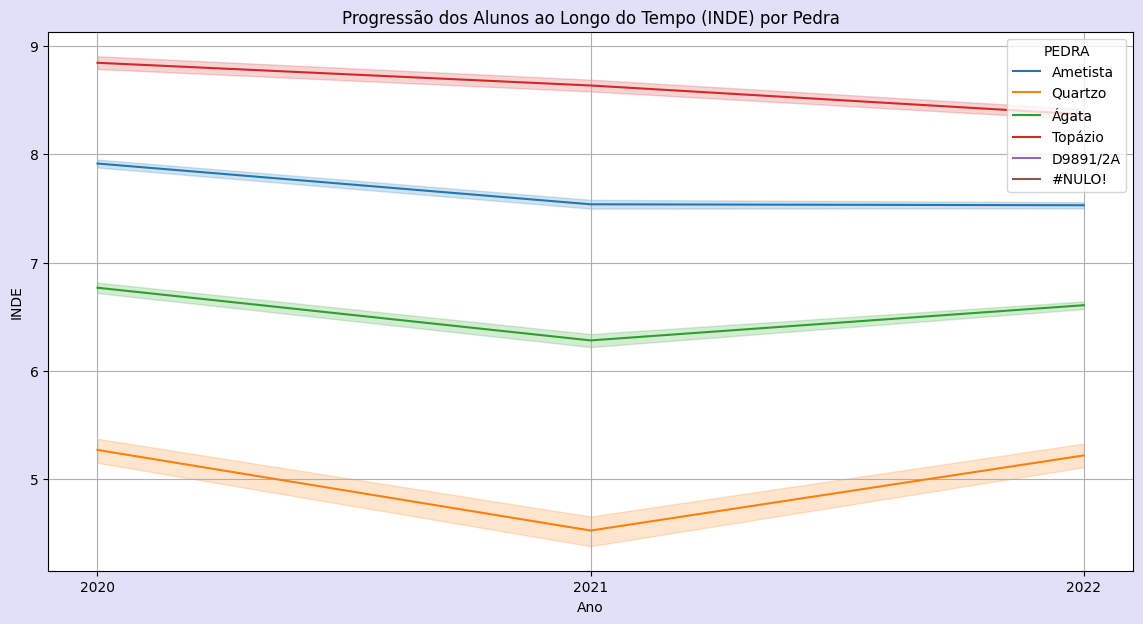

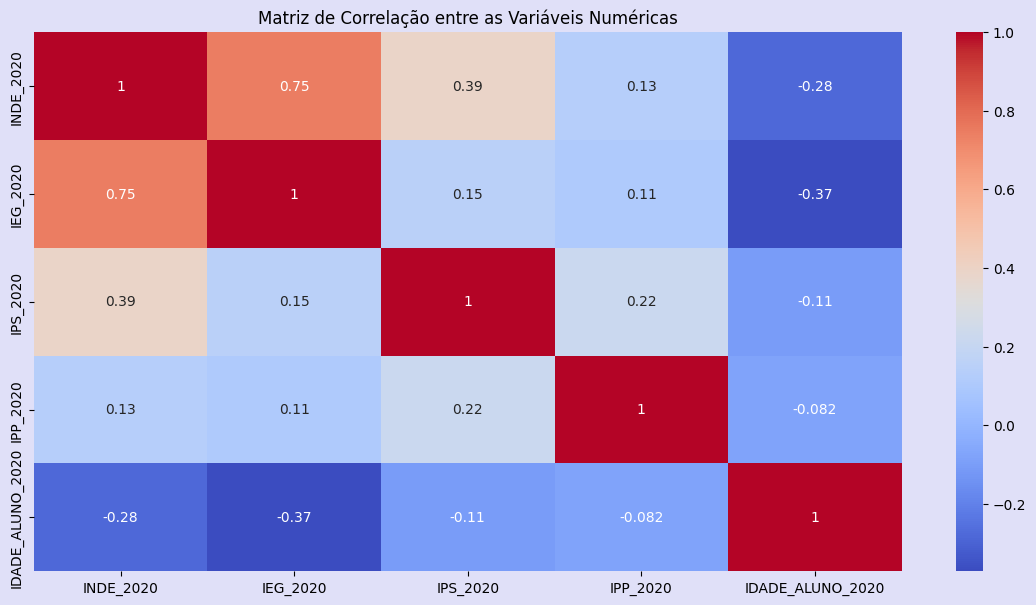

In [28]:
# OUTROS INSIGHTS

import pandas as pd
import matplotlib.pyplot as plt

# Analisar a relação entre idade e desempenho (INDE)
plt.figure(figsize=(14,7)).set_facecolor('#E0E0F8')
sns.boxplot(x='IDADE_ALUNO_2020_GROUPED', y='INDE_2020', data=df)
plt.title('Relação entre Idade e Desempenho (INDE)')
plt.xlabel('Faixa Etária')
plt.ylabel('INDE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Analisar a progressão dos alunos ao longo do tempo (INDE) por pedra
plt.figure(figsize=(14,7)).set_facecolor('#E0E0F8')
sns.lineplot(x='ANO', y='INDE', hue='PEDRA', data=df_unificado)
plt.title('Progressão dos Alunos ao Longo do Tempo (INDE) por Pedra')
plt.xlabel('Ano')
plt.ylabel('INDE')
plt.grid(True)
plt.show()

# Criar tabelas de contingência para analisar a relação entre as variáveis categóricas
contingencia_pedra_ponto_virada = pd.crosstab(df_unificado['PEDRA'], df_unificado['PONTO_VIRADA'])
contingencia_pedra_ponto_virada

# Convert 'IDADE_ALUNO_2020' to numeric, handling non-numeric values
df['IDADE_ALUNO_2020'] = pd.to_numeric(df['IDADE_ALUNO_2020'], errors='coerce')

# # Convert 'INDE_2020', 'IEG_2020', 'IPS_2020', 'IPP_2020' to numeric, handling non-numeric values
df['INDE_2020'] = pd.to_numeric(df['INDE_2020'], errors='coerce')
df['IEG_2020'] = pd.to_numeric(df['IEG_2020'], errors='coerce')
df['IPS_2020'] = pd.to_numeric(df['IPS_2020'], errors='coerce')
df['IPP_2020'] = pd.to_numeric(df['IPP_2020'], errors='coerce')

# You have already converted 'IDADE_ALUNO_2020' to numeric earlier in the code

# Now calculate the correlation matrix
correlacao = df[['INDE_2020', 'IEG_2020', 'IPS_2020', 'IPP_2020', 'IDADE_ALUNO_2020']].corr()
plt.figure(figsize=(14,7)).set_facecolor('#E0E0F8')
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre as Variáveis Numéricas')
plt.show()

# Insights adicionais:
# * Observar a relação entre o ponto de virada e o indicador de engajamento (IEG) ao longo dos anos.
# * Analisar a distribuição dos indicadores psicopedagógicos (IPS e IPP) por pedra e verificar se existem padrões.
# * Investigar a relação entre a idade dos alunos e a classificação de pedra.
# * Realizar uma análise de cluster para identificar grupos de alunos com características semelhantes.
